<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/EconomyLeadingIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finance-dataReader==0.9.11

## Library import & parameters

In [2]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from datetime import date

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## Nasdaq Index

Displaying from 2020-03-10 00:00:00 to 2022-02-07 00:00:00
Displaying from 2021-11-30 00:00:00 to 2022-02-07 00:00:00


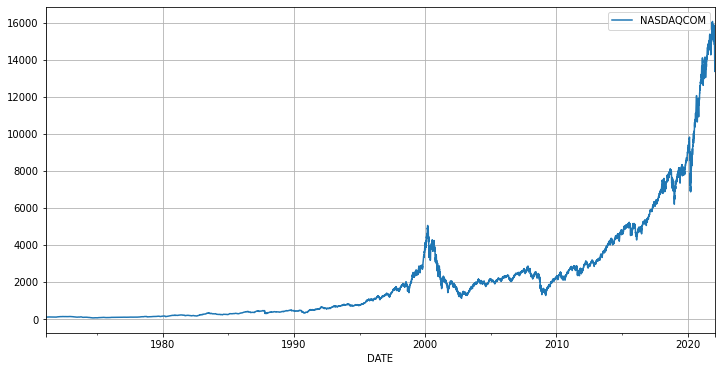

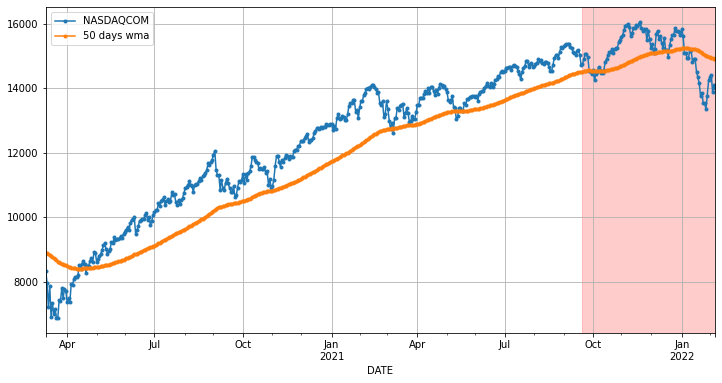

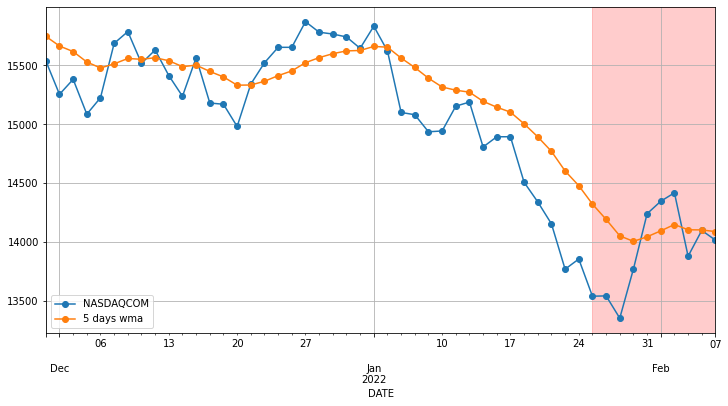

In [31]:
df = fdr.DataReader('NASDAQCOM', data_source='fred')
df.plot()
#print(df.tail())

#df.info()

#add 50 day moving average
sf = df.copy()
sf['50 days wma'] = sf.ewm(50).mean()

#setting dates
start_date = sf.index[-500]
end_date = sf.index[-1] 
highlight_date = sf.index[-100]
print('Displaying from ' + str(start_date) + ' to ' + str(end_date))

#highlight recent data

ax = sf[start_date:].plot(marker='.')
ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)


#add 5 day moving average
df['5 days wma'] = df.ewm(5).mean()

#highlight recent data
start_date = df.index[-50]
end_date = df.index[-1] 
highlight_date = df.index[-10]
print('Displaying from ' + str(start_date) + ' to ' + str(end_date))

ax = df[start_date:].plot(marker='o')
ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)



##Initial Claims Seasonally Adjusted(ICSA) 
>* Unployment related claim data from FRED
>*  NASDAQ in the background

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16025 entries, 1970-01-03 to 2022-02-07
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NASDAQCOM  15968 non-null  float64
 1   ICSA       16025 non-null  float64
dtypes: float64(2)
memory usage: 375.6 KB
None


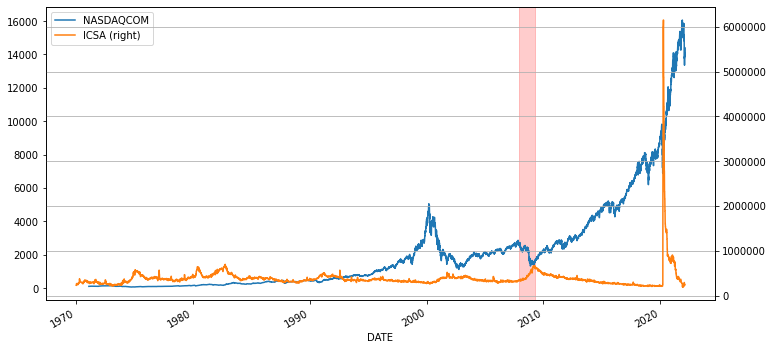

In [4]:
df1 = fdr.DataReader(['NASDAQCOM', 'ICSA'], data_source='fred')
ax = df1.plot(secondary_y='ICSA')

print(df1.info())

#Highlight the financial crisis
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

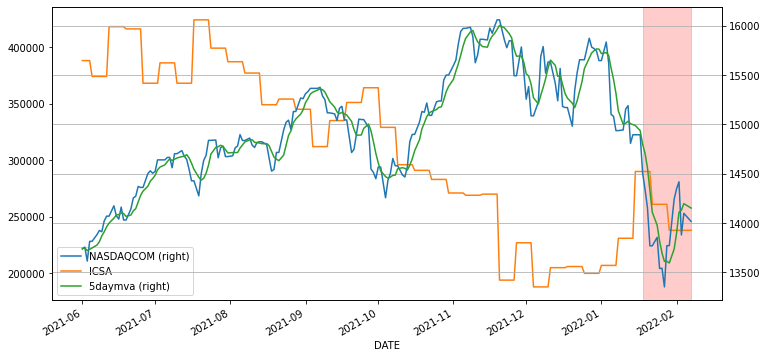

In [5]:
#add 5 day moving average
df1['5daymva'] = df1['NASDAQCOM'].fillna(0).rolling(5).mean()
ax = df1['2021-06':].plot(secondary_y=['NASDAQCOM','5daymva'])
ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)

##Consumer Sentiment (UMCSENT)
https://fred.stlouisfed.org/series/UMCSENT
>* Peoples' sentiment on how the economy is going by Univ of Michigan Consumer Sentiment (UMCSENT)
>* Monthly 

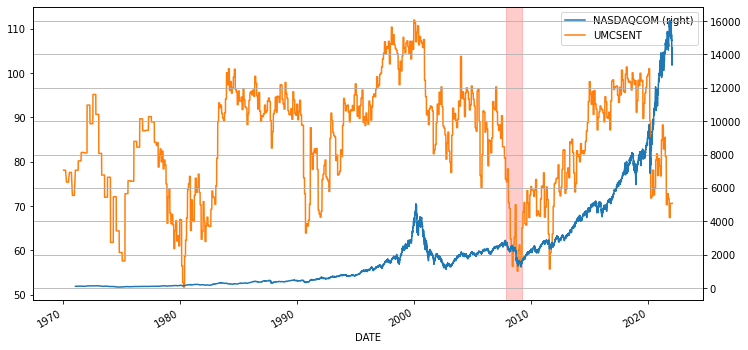

In [6]:
df = fdr.DataReader(['NASDAQCOM', 'UMCSENT'], data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

#highlight the financial crisis
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

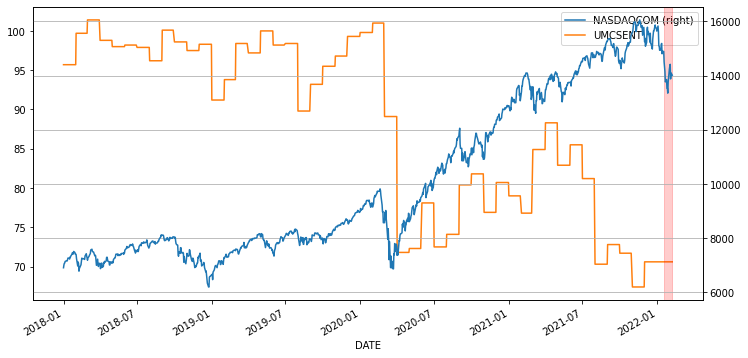

In [7]:
ax = df['2018':].plot(secondary_y=['NASDAQCOM', '5daymva'])
ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)

New One Family Houses Sold: United States (HSN1F)

https://fred.stlouisfed.org/series/HSN1F
>* House sold data
>* Monthly


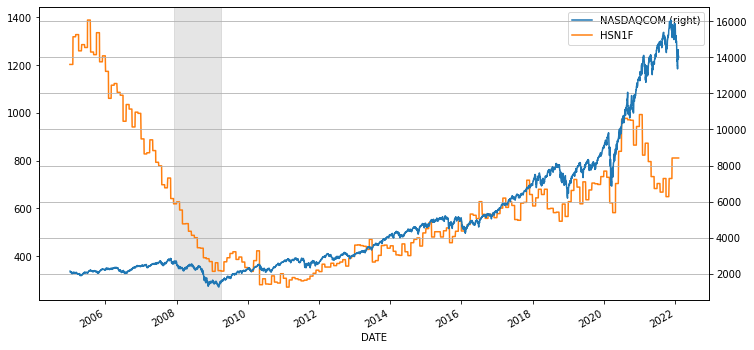

In [8]:
df = fdr.DataReader(['NASDAQCOM', 'HSN1F'], start='2005', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

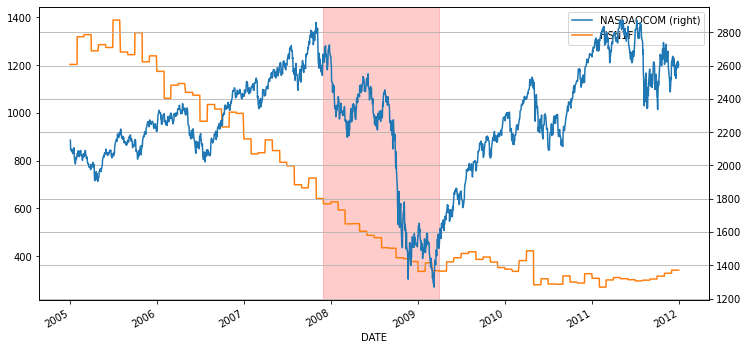

In [9]:
# During the financial crisis
ax = df['2003': '2011'].plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

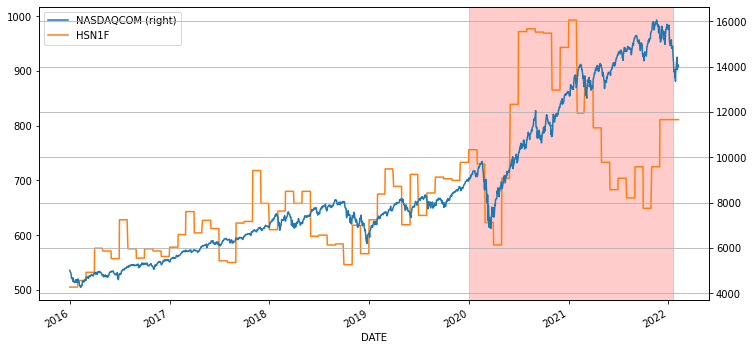

In [10]:
ax = df['2016':].plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2020-01-01', '2022-01-19', color='red', alpha=0.2)

##Unemployment rate (UNRATE)

https://fred.stlouisfed.org/series/UNRATE

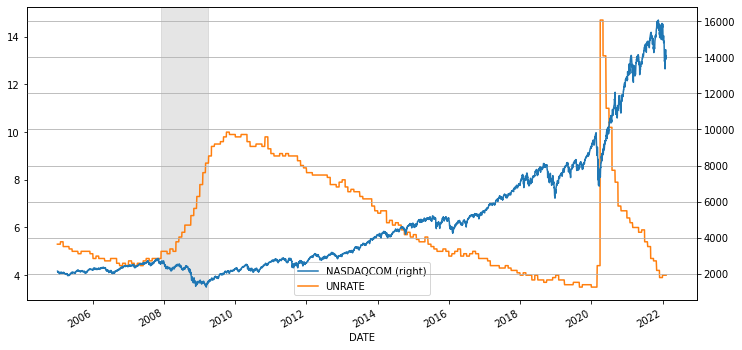

In [11]:
df = fdr.DataReader(['NASDAQCOM', 'UNRATE'], start='2005', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

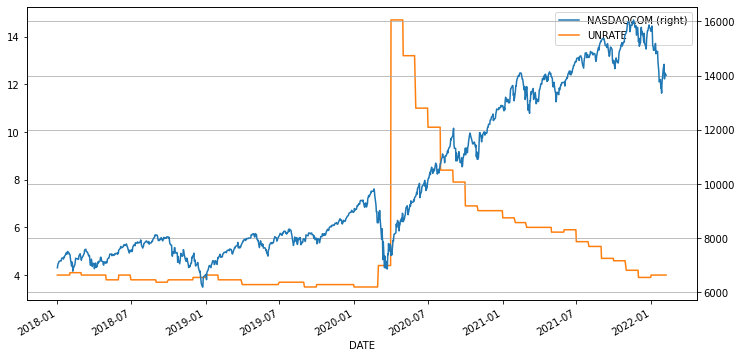

In [12]:
ax = df['2018':].plot(secondary_y='NASDAQCOM')

##M2SL Money stock measures

>* Money poured into the market by the government to sustain the economy otherwise not functional well
>* Original M2 discontinued and replaced by M2SL 

https://fred.stlouisfed.org/series/M2SL

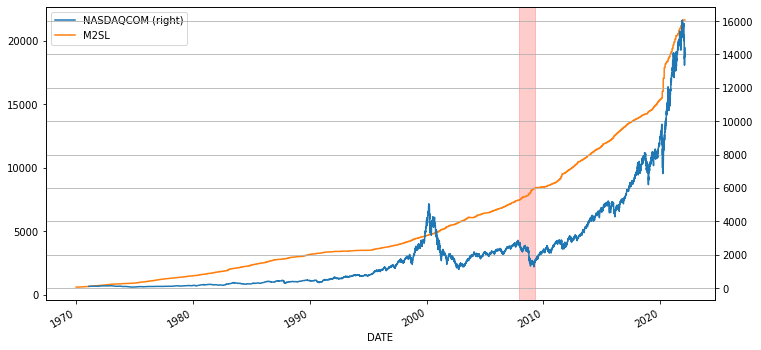

In [13]:
df = fdr.DataReader(['NASDAQCOM', 'M2SL'], data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

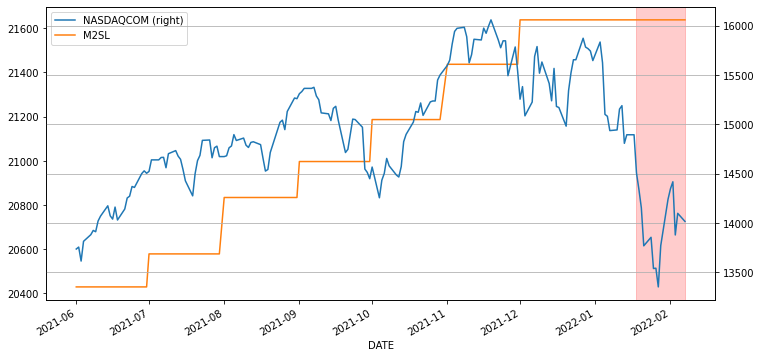

In [14]:
ax = df['2021-06':].plot(secondary_y='NASDAQCOM')
ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)

##High yield bond spread (BAMLH0A0HYM2)

https://fred.stlouisfed.org/series/BAMLH0A0HYM2

It is a high risk high yield bond that invests on higher interest rates because they have lower credit ratings than investment-grade bonds. 

High-yield bonds are more likely to default, so they must pay a higher yield than investment-grade bonds to compensate investors. 

From
https://www.investopedia.com/terms/h/high_yield_bond.asp

The spread means the difference to the government bond

When the economy is getting bad, the spread gets larger.

The spread named as 'ICE BofA US High Yield Index Option-Adjusted Spread' is provided from FRED.

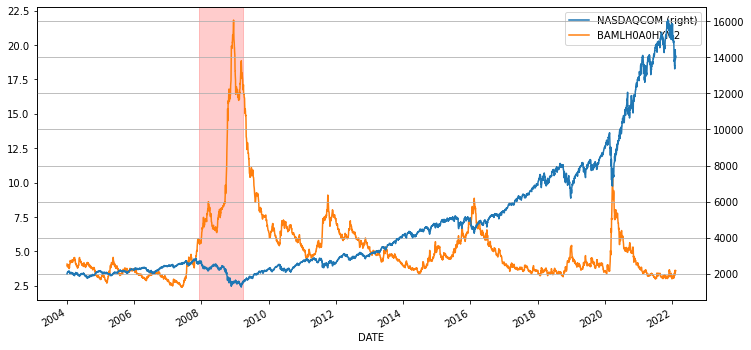

In [15]:
df = fdr.DataReader(['NASDAQCOM', 'BAMLH0A0HYM2'], start='2004-01-01', end=end_date, data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

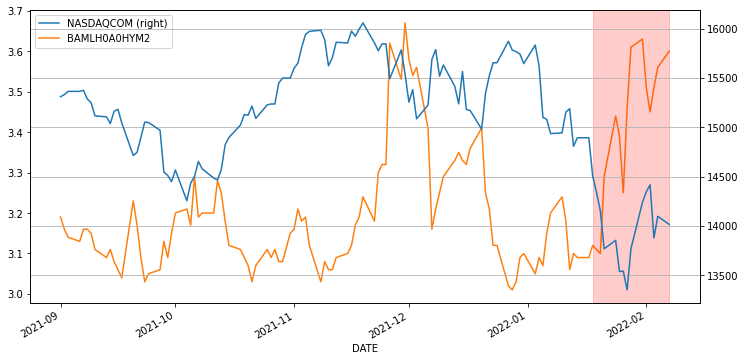

In [16]:
#df['5daymva'] = df['NASDAQCOM']['2021-06-01':].fillna(0).rolling(5).mean()
#df['5daymva_hybspread'] = df['BAMLH0A0HYM2']['2021-06-01':].fillna(0).rolling(5).mean()
ax = df['2021-09-01':].plot(secondary_y=['NASDAQCOM','5daymva'])
ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)